In [1]:
import pickle as pkl
import pandas as pd

In [2]:
file_path = "results/rsna/scores_02231621.pkl"
with open(file_path, "rb") as file:
    results = pkl.load(file=file)
    desc = results[0]
    scores_list = results[1:]
print(desc)

200,50 for visualization


for changing desc if needed

In [3]:
# change_desc = False
# if change_desc:
#     new_desc = f'knn with k = 5'
#     results[0] = new_desc
#     with open(file_path, "wb") as file:
#         pkl.dump(obj=results, file=file)

In [4]:
for scores in scores_list:
    print(abs(scores['nona euclidean mlp'][0]))

0.009517808444797993
0.012638711370527744
0.012982712127268314
0.011410923674702644
0.011372833512723446
0.009911784902215004
0.011184078641235828
0.01253758929669857
0.01143155712634325
0.011249554343521595


In [5]:
scores = {method.split(" mlp")[0]: [abs(scores[method][0]) for scores in scores_list] for method in scores_list[0] if "mlp" in method and "cos" not in method}

<Axes: >

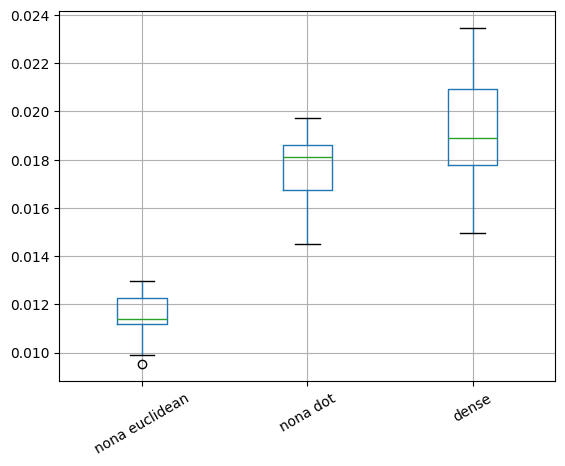

In [6]:
pd.DataFrame(scores).boxplot(rot=30)

In [7]:
pd.DataFrame(scores).median()

nona euclidean    0.011392
nona dot          0.018118
dense             0.018912
dtype: float64

In [8]:
times = {method: [scores[method][1] for scores in scores_list] for method in scores_list[0]}

In [9]:
pd.DataFrame(times).median() / 3600

nona euclidean mlp    1.018753
nona dot mlp          1.358732
dense mlp             0.432969
dtype: float64